Sequence Visualization

In [1]:
from PIL import Image 
import torchvision.transforms as T
import matplotlib.pyplot as plt
import json, torchvision, numpy as np, random

In [10]:
pics = json.load(open('data/faces_samples/metadata.json'))
to_tensor = T.ToTensor()

In [24]:
t = list(pics.keys())[2:4]

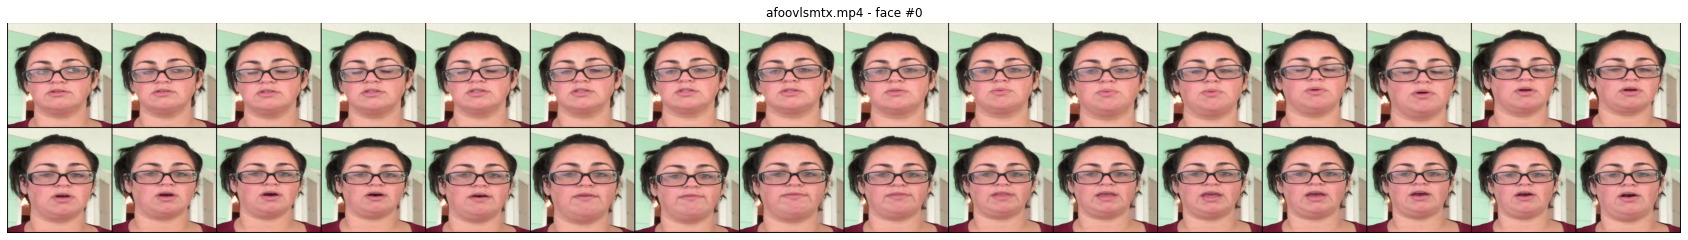

In [25]:
for video in t:
    if pics[video]['label'] != 1 or pics[video]['num_faces'] < 2:
        pass #continue
    dict_of_pics = pics[video]['faces']
    for key in dict_of_pics:
        images = [to_tensor(Image.open(f'data/faces_samples/{t}')) for t in dict_of_pics[key]]
        grid = torchvision.utils.make_grid(images, nrow=16)
        fig, ax = plt.subplots(1,1, figsize=(30,31))
        ax.imshow(np.transpose(grid.numpy(), (1,2,0)))
        ax.set_title(video + f' - face #{key}')
        ax.axis('off')
        plt.show()

In [2]:
import dataset as ds
from torchvision import transforms
import torch

In [3]:
transform = transforms.Compose([transforms.Resize(224), transforms.ToTensor(), ])
                                    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]), ])

In [10]:
dataset = ds.AugmentedDataset('datasets/full_train_dataset.csv', 'data/faces/', transform = transform, p = 0.1)
sampler = torch.utils.data.RandomSampler(dataset, replacement=False)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, sampler=sampler)

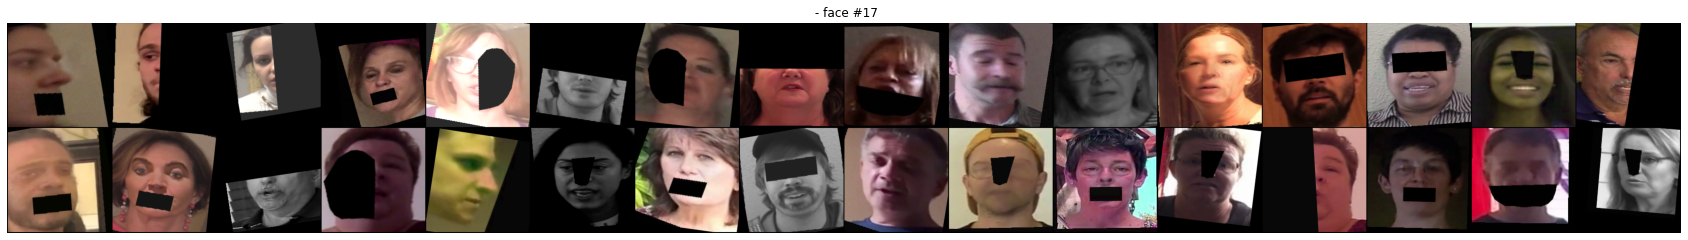

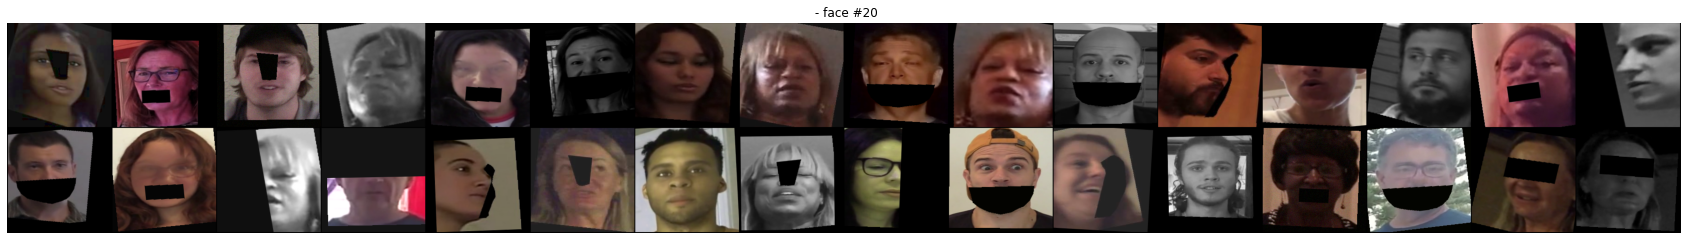

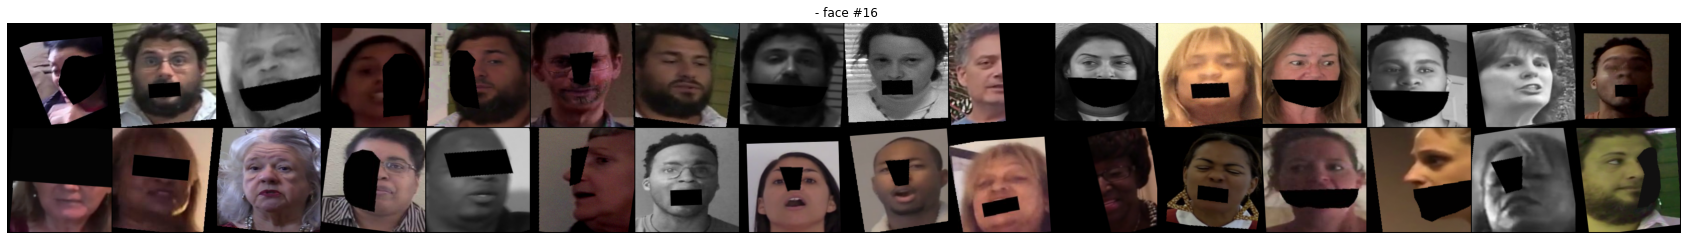

In [11]:
for i, (data, labels) in enumerate(loader):
    grid = torchvision.utils.make_grid(data, nrow=16)
    fig, ax = plt.subplots(1,1, figsize=(30,31))
    ax.imshow(np.transpose(grid.numpy(), (1,2,0)))
    ax.set_title(f' - face #{labels.sum()}')
    ax.axis('off')
    plt.show()
    if i > 2:
        break